## SL&C Naver Customer Review analysis
- data source : Naver myplace 
- period : 2018-03-07 ~ 2023-10-17
- number of stores : 63
- number of reviews : 14,866
--- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes',unicode_minus=False)

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('concated_file/naver_review_all_20231018.xlsx')
print(df.shape)
df.head()

(14866, 7)


,brand,type,store,date,nickname,content,revisit
0,Chai797,Black,Chai797 Black 서래마을,2023-10-06,유리푸틴,긋,1번째 방문
1,Chai797,Black,Chai797 Black 서래마을,2023-09-22,차니아버지,ㅇ,33번째 방문
2,Chai797,Black,Chai797 Black 서래마을,2023-09-05,soosoo3,"진심 전가복...여기처럼 맛없는곳 처음.....해산물도 가격에비해 빈약하고, 그냥 ...",1번째 방문
3,Chai797,Black,Chai797 Black 서래마을,2023-09-02,삶은기록,NaN,1번째 방문
4,Chai797,Black,Chai797 Black 서래마을,2023-08-07,쏭해8,생일 기념으로 방문한 챠이 797!!!\n북경오리 코스로 먹었어요~ 저한텐 다 먹기...,1번째 방문


In [3]:
print('Number of stores = ', df['store'].nunique())
print('Number of reviews = ', df['content'].count())
print('Number of users = ', df['nickname'].nunique())

print('Date Period = ', min(df['date']), ' ~ ', max(df['date']))

Number of stores =  63
Number of reviews =  14083
Number of users =  11966
Date Period =  2018-03-07 00:00:00  ~  2023-10-17 00:00:00


---
- SL&C 총 63개 매장에 대한, 2018년 3월부터 2023년 10월까지 약 5년 간의 네이버 고객 리뷰 데이터 
- 리뷰 건수는 총 14,083건이며, 리뷰에 참여한 고객 수는 11,966명
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14866 entries, 0 to 14865
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   brand     14866 non-null  object        
 1   type      14866 non-null  object        
 2   store     14866 non-null  object        
 3   date      14866 non-null  datetime64[ns]
 4   nickname  14866 non-null  object        
 5   content   14083 non-null  object        
 6   revisit   14866 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 813.1+ KB


In [5]:
## 분석의 편의를 위해 date -> year, month, day, 요일로 구분 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

## 분석의 편의를 위해 revisit -> 숫자만 추출
df['revisit'] = df['revisit'].str.replace('번째 방문', '')
df['revisit'].astype('int64')

0         1
1        33
2         1
3         1
4         1
         ..
14861     1
14862     1
14863     1
14864     1
14865     1
Name: revisit, Length: 14866, dtype: int64

In [6]:
df.head()

,brand,type,store,date,nickname,content,revisit,year,month,day,weekday
0,Chai797,Black,Chai797 Black 서래마을,2023-10-06,유리푸틴,긋,1,2023,10,6,Friday
1,Chai797,Black,Chai797 Black 서래마을,2023-09-22,차니아버지,ㅇ,33,2023,9,22,Friday
2,Chai797,Black,Chai797 Black 서래마을,2023-09-05,soosoo3,"진심 전가복...여기처럼 맛없는곳 처음.....해산물도 가격에비해 빈약하고, 그냥 ...",1,2023,9,5,Tuesday
3,Chai797,Black,Chai797 Black 서래마을,2023-09-02,삶은기록,NaN,1,2023,9,2,Saturday
4,Chai797,Black,Chai797 Black 서래마을,2023-08-07,쏭해8,생일 기념으로 방문한 챠이 797!!!\n북경오리 코스로 먹었어요~ 저한텐 다 먹기...,1,2023,8,7,Monday


---

year
2018       6
2019     112
2020    1213
2021    3334
2022    5547
2023    4654
Name: count, dtype: int64


<Axes: xlabel='year', ylabel='count'>

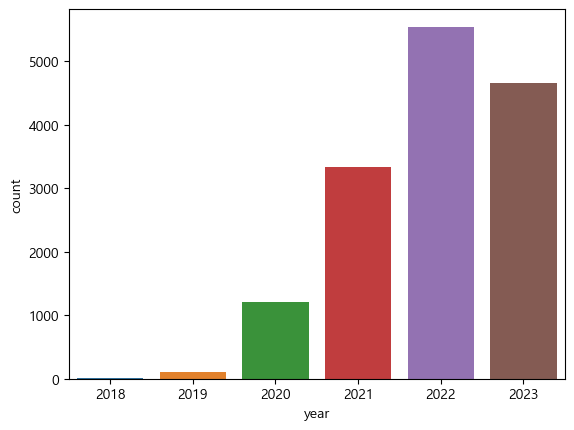

In [7]:
## 연도별 리뷰 건수 추이 파악 
year_cnt = df['year'].value_counts()
print(year_cnt.sort_index())
sns.countplot(data = df, x='year')

2022년: month
1     362
2     348
3     387
4     386
5     367
6     479
7     541
8     547
9     422
10    444
11    594
12    670
Name: count, dtype: int64
2023년: month
1     585
2     555
3     532
4     426
5     434
6     434
7     584
8     516
9     385
10    203
Name: count, dtype: int64


[Text(0.5, 1.0, 'Year 2023: Reviews by month')]

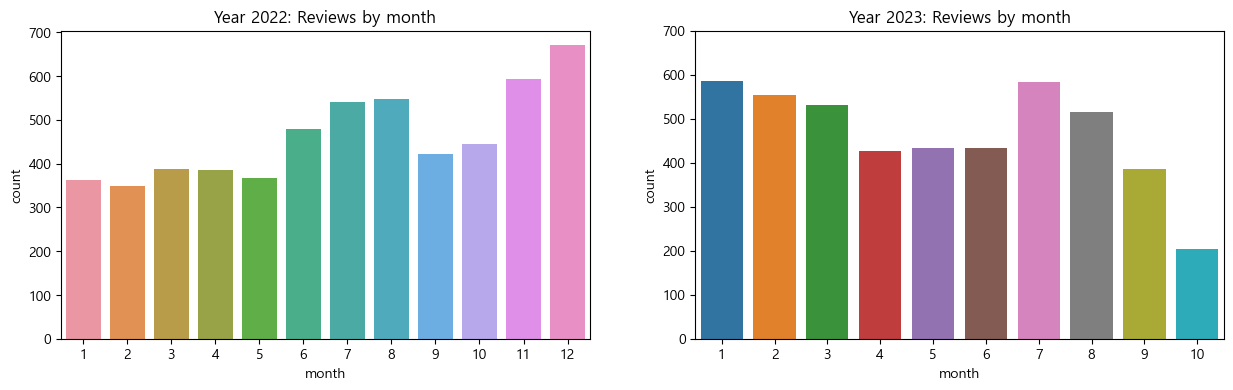

In [8]:
## 2022~ 2023 월별 리뷰 건수 추이 파악 
df_2022 = df[df['year'] == 2022]
df_2023 = df[df['year'] == 2023]

month_cnt_2022 = df_2022['month'].value_counts()
print('2022년:', month_cnt_2022.sort_index())
month_cnt_2023 = df_2023['month'].value_counts()
print('2023년:', month_cnt_2023.sort_index())

figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,4)

sns.countplot(data = df_2022, x='month', ax=ax1)
sns.countplot(data = df_2023, x='month', ax=ax2)
plt.ylim([0, 700])  
ax1.set(title = 'Year 2022: Reviews by month')
ax2.set(title = 'Year 2023: Reviews by month')

brand
Chai797    2316
서리재         442
정육점         181
호우섬        2608
Name: count, dtype: int64
brand
Chai797    2107
서리재         303
정육점         156
호우섬        2088
Name: count, dtype: int64


[Text(0.5, 1.0, 'Year 2023: Reviews by brand')]

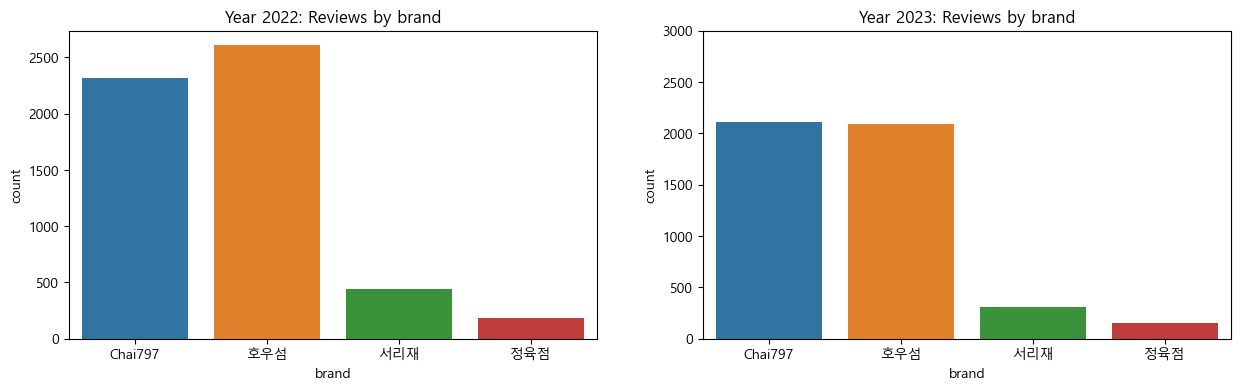

In [9]:
##  브랜드별 리뷰 건수 
brand_cnt_2022 = df_2022['brand'].value_counts()
print(brand_cnt_2022.sort_index())
brand_cnt_2023 = df_2023['brand'].value_counts()
print(brand_cnt_2023.sort_index())

figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,4)

sns.countplot(data = df_2022, x='brand', ax=ax1)
sns.countplot(data = df_2023, x='brand', ax=ax2)
plt.ylim([0, 3000])  
ax1.set(title = 'Year 2022: Reviews by brand')
ax2.set(title = 'Year 2023: Reviews by brand')

store
호우섬 더현대서울점                   468
호우섬 청량리역점                    242
호우섬 코엑스점                     235
호우섬 대전신세계 아트앤사이언스점           227
Chai797 Plus 김포롯데몰점          222
                            ... 
Chai797 Plus 뉴코아아울렛 강남점       15
Chai797 Plus 현대시티아울렛 동대문점     10
서리재 롯데부산본점                     8
Chai797 Plus 신세계김해점            8
Chai797 광화문 SFC점               4
Name: count, Length: 63, dtype: int64


<Axes: xlabel='count', ylabel='Density'>

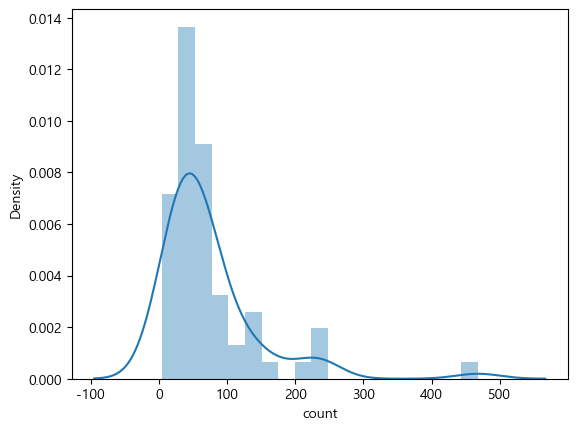

In [10]:
## 매장별 리뷰건수 분포 ('23년')
store_cnt_2023 = df_2023['store'].value_counts()
a = store_cnt_2023.sort_values(ascending=False)
print(a)
sns.distplot(a)

store
호우섬 더현대서울점                   1098
호우섬 대전신세계 아트앤사이언스점            541
호우섬 코엑스점                      368
Chai797 잠실롯데월드몰점              356
서리재 대전신세계 아트앤사이언스점            166
살롱드호우섬 현대목동점                  143
Chai797 Plus 건대스타시티점          137
Chai797 Plus 현대중동점            128
Chai797 Plus 김포롯데몰점           124
호우섬 현대판교점                     117
서리재 신세계 센텀시티점                 114
Chai797 잠실롯데캐슬점                98
Chai797 여의도점                   93
Chai797 Plus 현대충청점             92
서리재 현대미아점                      87
Chai797 광화문점                   83
Chai797 Plus 롯데부산본점            78
Chai797 Plus 현대미아점             76
서리재 신세계의정부점                    75
Chai797 시청점                    73
Chai797 Plus 대전현대아울렛점          70
Chai797 Plus 신세계광주점            65
Chai797 을지로점                   64
Chai797 역삼 GFC                 62
Chai797 Plus 현대신촌점             61
호우섬 롯데명동점                      61
호우섬 신세계 센텀시티점                  61
Chai797 청계천점                   58
정육점 강남점                        58
Chai797 

<Axes: xlabel='count', ylabel='Density'>

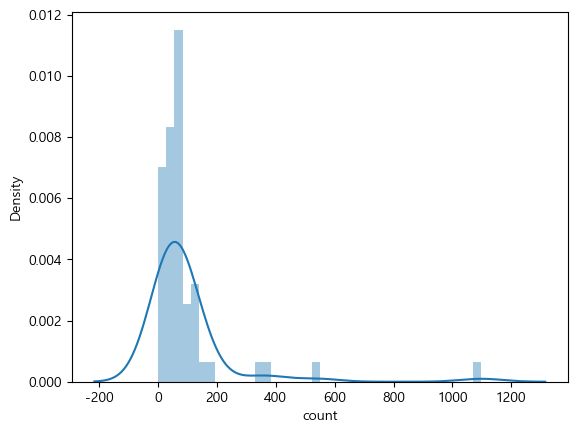

In [11]:
## 매장별 리뷰건수 분포 ('22년')
store_cnt_2022 = df_2022['store'].value_counts()
b = store_cnt_2022.sort_values(ascending=False)
print(b)
sns.distplot(b)

---
- '22년 기준 약 554백건, '23년은 10/18일까지의 자료이나 약 46백건의 리뷰 존재 
- 평균 월 4~5백건의 리뷰가 등록되고 있음 
- 매장수가 많은 차이797과 호우섬에 대한 리뷰가 주를 이루나 (차이 37개, 호우섬 16개, 정육점 5개, 5개) 
- 호우섬은 차이797대비 매장수는 절반인데 비해, 리뷰 건수는 거의 비슷함 (특히 호우섬 더 현대서울점의 리뷰 건수가 월등히 많음)
- 한편 몇개의 인기매장을 제외하면, 대부분의 매장에서는 리뷰 건수가 월 10건도 안됨 
---

In [12]:
## 고객 1명 기준으로 몇건의 리뷰를 작성하였는지 파악 
from collections import Counter
x1 = dict(Counter(df['nickname'])) ## 닉네임 중복횟수를 dict로 저장 
x1_df = pd.DataFrame.from_dict(x1, orient='index')  ## 데이터프레임 형태로 변환 
x1_df.columns = ['review_cnt']
x1_df.head()

,review_cnt
유리푸틴,1
차니아버지,18
soosoo3,2
삶은기록,3
쏭해8,1


In [13]:
print('1인당 평균 리뷰수 = ', np.mean(x1_df['review_cnt']))
print('1인 최다 리뷰횟수 = ', np.max(x1_df['review_cnt']))
x1_df.sort_values('review_cnt', ascending = False)[:10]

1인당 평균 리뷰수 =  1.2423533344476014
1인 최다 리뷰횟수 =  37


,review_cnt
바램15,37
kim****,26
par****,18
차니아버지,18
sun****,16
쑤바라시오사케,16
you****,16
cha****,16
eun****,16
jin****,15


In [14]:
## 리뷰자 별 리뷰내용을 살펴보자 
reviewer = 'kim****'

x1_1 = df[df['nickname'] == reviewer]
x1_1

,brand,type,store,date,nickname,content,revisit,year,month,day,weekday
787,Chai797,CD,Chai797 Plus 김포롯데몰점,2023-02-17,kim****,좋아요,1,2023,2,17,Friday
2543,Chai797,CD,Chai797 Plus 서현점,2023-03-08,kim****,맛있어요~~,1,2023,3,8,Wednesday
2776,Chai797,CD,Chai797 Plus 신세계 천안아산점,2023-08-01,kim****,매장이 청결하네요.딤섬 맛있네요.,1,2023,8,1,Tuesday
3330,Chai797,CD,Chai797 Plus 타임테라스 동탄점,2022-12-09,kim****,굿,1,2022,12,9,Friday
3481,Chai797,CD,Chai797 Plus 현대미아점,2022-09-23,kim****,맛있어요,1,2022,9,23,Friday
3528,Chai797,CD,Chai797 Plus 현대미아점,2021-12-18,kim****,굿,1,2021,12,18,Saturday
4234,Chai797,CD,Chai797 Plus 현대충청점,2022-06-10,kim****,맛나요,1,2022,6,10,Friday
5064,Chai797,JUCD,Chai797 여의도점,2023-08-13,kim****,굿!,1,2023,8,13,Sunday
5266,Chai797,JUCD,Chai797 여의도점,2021-01-04,kim****,.,1,2021,1,4,Monday
6142,Chai797,JUCD,Chai797 잠실롯데월드몰점,2022-02-01,kim****,친절하고 양도 많고 맛있었어요^^\n창가쪽 앉았는데 바깥 야경이 시간이 지나면서 점...,1,2022,2,1,Tuesday
